# Logistic Regression -- Case-study on Credit Risk

# Context: 
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer 
eligibility for loan.

# Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

* Variable	      Description
* Loan_ID	          Unique Loan ID
* Gender	          Male/ Female
* Married	          Applicant married (Y/N)
* Dependents	      Number of dependents
* Education	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed	  Self employed (Y/N)
* ApplicantIncome	  Applicant income
* CoapplicantIncome Coapplicant income
* LoanAmount	      Loan amount in thousands
* Loan_Amount_Term  Term of loan in months
* Credit_History	  credit history meets guidelines
* Property_Area	  Urban/ Semi Urban/ Rural
* Loan_Status	      Loan approved (Y/N)

In [23]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [24]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys

# calculate accuracy measures and confusion matrix
from sklearn import metrics

## Read Data from CSV

In [25]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


## Preprocess Dataset

In [26]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [27]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [28]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [29]:
# every column's missing value is replaced with 0 respectively
cr_df = cr_df.fillna('0')
#cr_df = cr_df.replace({'NaN':df.median()})
cr_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1,Urban,1


In [30]:
#Lets analysze the distribution of the various attribute
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [31]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
cr_df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5446.078125,1877.807292,142.557292
1,5384.068720,1504.516398,140.533175


In [32]:
#Convert X & Y variable to a categorical variable as relevant
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')

In [33]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Gender               614 non-null object
Married              614 non-null object
Dependents           614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null int64
Credit_History       614 non-null category
Property_Area        614 non-null object
Loan_Status          614 non-null category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 30.2+ KB


In [34]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = cr_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


**There is a slight imbalance in the data**

In [35]:
## Define X and Y variables
X = cr_df.drop('Loan_Status', axis=1)
Y = cr_df[['Loan_Status']]

In [36]:
print(X.shape)
print(X.head())

(614, 10)
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount Credit_History Property_Area  
0                0.0           0              1         Urban  
1             1508.0         128              1         Rural  
2                0.0          66              1         Urban  
3             2358.0         120              1         Urban  
4                0.0         141              1         Urban  


## Convert Categorical Variables to Dummy Variables

In [37]:
#Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)
X.shape

(614, 17)

In [38]:
print(X.head())

   ApplicantIncome  CoapplicantIncome  LoanAmount  Gender_Female  Gender_Male  \
0             5849                0.0           0              0            1   
1             4583             1508.0         128              0            1   
2             3000                0.0          66              0            1   
3             2583             2358.0         120              0            1   
4             6000                0.0         141              0            1   

   Married_No  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  \
0           1            0             0             0              0   
1           0            1             1             0              0   
2           0            1             0             0              0   
3           0            1             0             0              0   
4           1            0             0             0              0   

   Education_Not Graduate  Self_Employed_No  Self_Employed_Yes  \
0       

## Splitting Data into Training and Test Sets

In [39]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

## Build the Logistic Regression Model

We will use the sklearn library to build the model and make predictions

In [40]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\python\python38-32\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
# Predict on train set
pred_train = logreg.predict(X_train)

from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)

print("confusion matrix = ")
print(mat_train)

confusion matrix = 
[[ 63  75]
 [ 25 266]]


## Predict on Test Data 

In [42]:
#Predict for test set
pred_test = logreg.predict(X_test)

mat_test = confusion_matrix(y_test,pred_test)
print("confusion matrix = ")
print(mat_test)

confusion matrix = 
[[ 20  34]
 [ 11 120]]


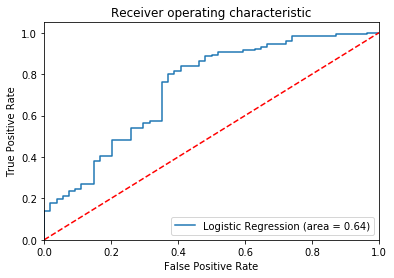

In [43]:
# AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
auc_score = metrics.roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.73